In [68]:
import pandas as pd
import os
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [71]:
MODEL = ['nosharedselfattention', 'overfitselfattention', 'sar']
SEED = [str(i) for i in range(1, 6)]
DATA = ['beauty', 'yelp'] # 'sports'
LAYER = ['2'] # "['1', '2']"

def load_data(MODEL, SEED, DATA, LAYER):
    total_dict = {
        'HIT@1': [],
        'HIT@5': [],
        'HIT@10': [],
        'NDCG@1': [],
        'NDCG@5': [],
        'NDCG@10': [],
        'MRR': [],
        'data': [],
        'model': [],
        'seed': [],
        'layer':[]
    }

    for model in MODEL:
        for seed in SEED:
            for data in DATA:
                for layer in LAYER:
                    # try:
                    _path = path.format(model=model,data=data,layer=layer,seed=seed)
                    with open(_path) as f:
                        content = f.readlines()
                        for line in content:
                            if 'Test,' in line: # Test, Epoch:0, HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                                break
                        metrics = line.split('\n')[0].split('Epoch:0, ')[1].split(' ') # HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                        for item in metrics:
                            key, value = item.split(':')
                            total_dict[key].append(float(value))
                        total_dict['seed'].append(seed)
                        total_dict['data'].append(data)
                        total_dict['model'].append(model)
                        total_dict['layer'].append(layer)
                    # except:
                    #     print(f'error for {layer} {model} {data} {seed}')
    dataset = pd.DataFrame(total_dict)
    return dataset

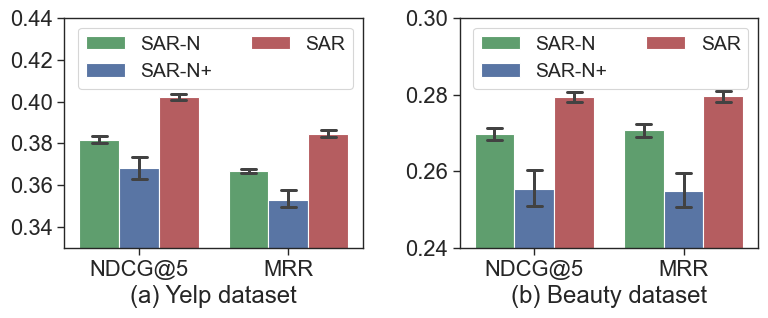

In [80]:
dataset = load_data(MODEL, SEED, DATA, LAYER)
dataset.groupby(['layer', 'data', 'model']).mean().sort_values(by=['data', 'model', 'layer']).round(4)
_dataset = pd.melt(
    frame=dataset, 
    id_vars=['layer', 'data', 'model'], 
    # value_vars=['HIT@1', 'HIT@5', 'HIT@10', 'NDCG@5', 'NDCG@10', 'MRR'], 
    value_vars=['NDCG@5', 'MRR'], 
    var_name='Metrics', 
    value_name='Scores')

def plot(dataset, figure_name='bar_paramshared'):

    dataset['model'] = dataset['model'].replace(['sar', 'nosharedselfattention', 'overfitselfattention'], ['SAR', 'SAR-N', 'SAR-N+'])
    with PdfPages(f'{figure_name}.pdf') as pdf:
        f = plt.figure(dpi=100, figsize=(8,3.5))
        f.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.2)
        style = ['darkgrid', 'dark', 'white', 'whitegrid', 'ticks']
        context = ['paper', 'notebook', 'talk', 'poster']
        palette = sns.color_palette('deep')
        sns.set_theme(style=style[4],
                context=context[0],
                font='Arial',
                font_scale=1.8,
                palette=[palette[2], palette[0], palette[3]] + palette[4:])
        f.add_subplot(1,2,1)
        # _dataset = dataset[dataset.Metrics == 'NDCG@10']
        _dataset = dataset[dataset.data == 'yelp']
        sns.barplot(x='Metrics', y='Scores', hue='model', data=_dataset, capsize=.1, ci=99)
        plt.legend(ncol=2, fontsize=14)
        plt.tight_layout()
        plt.ylim(0.33,0.44)
        ax = plt.gca()
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
        plt.ylabel('')
        plt.xlabel('(a) Yelp dataset')
        f.add_subplot(1,2,2)
        # _dataset = dataset[dataset.Metrics == 'MRR']
        _dataset = dataset[dataset.data == 'beauty']
        sns.barplot(x='Metrics', y='Scores', hue='model', data=_dataset, capsize=.1, ci=99)
        plt.legend(ncol=2, fontsize=14)
        plt.tight_layout()
        plt.ylim(0.24,0.3)
        ax = plt.gca()
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.02))
        plt.ylabel('')
        plt.xlabel('(b) Beauty dataset')
        pdf.savefig(f)
plot(_dataset)

In [62]:
_dataset

,layer,data,model,Metrics,Scores
0,2,beauty,SAR-N,NDCG@5,0.2671
1,2,yelp,SAR-N,NDCG@5,0.3801
2,2,beauty,SAR-N,NDCG@5,0.2694
3,2,yelp,SAR-N,NDCG@5,0.3807
4,2,beauty,SAR-N,NDCG@5,0.2706
5,2,yelp,SAR-N,NDCG@5,0.3834
6,2,beauty,SAR-N,NDCG@5,0.2719
7,2,yelp,SAR-N,NDCG@5,0.3804
8,2,beauty,SAR-N,NDCG@5,0.2701
9,2,yelp,SAR-N,NDCG@5,0.3832


In [ ]:
path = '/data/anonymous/seqrec/explore_{model}_{data}/search_explore_{model}_{data}_lay_{layer}_loc_{local}_see_{seed}/log.log'
MODEL = ['localselfattention']
SEED = [str(i) for i in range(1, 6)]
# DATA = ['beauty', 'sports', 'yelp']
DATA = ['beauty']
LAYER = [str(i) for i in range(1, 3)]
LOCAL = ['3'] + [str(5*i) for i in range(1, 11)]

def load_data(MODEL, SEED, DATA, LAYER, LOCAL):
    total_dict = {
        'HIT@1': [],
        'HIT@5': [],
        'HIT@10': [],
        'NDCG@1': [],
        'NDCG@5': [],
        'NDCG@10': [],
        'MRR': [],
        'data': [],
        'model': [],
        'seed': [],
        'layer': [],
        'local': []
    }

    for model in MODEL:
        for seed in SEED:
            for data in DATA:
                for layer in LAYER:
                    for local in LOCAL:
                    # try:
                        _path = path.format(model=model,data=data,layer=layer,seed=seed,local=local)
                        with open(_path) as f:
                            content = f.readlines()
                            for line in content:
                                if 'Test,' in line: # Test, Epoch:0, HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                                    break
                            metrics = line.split('\n')[0].split('Epoch:0, ')[1].split(' ') # HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                            for item in metrics:
                                key, value = item.split(':')
                                total_dict[key].append(float(value))
                            total_dict['seed'].append(seed)
                            total_dict['data'].append(data)
                            total_dict['model'].append(model)
                            total_dict['layer'].append(layer)
                            total_dict['local'].append(local)
                    # except:
                    #     print(f'error for {layer} {model} {data} {seed}')
    dataset = pd.DataFrame(total_dict)
    return dataset

dataset = load_data(MODEL, SEED, DATA, LAYER, LOCAL)
dataset.groupby(['layer', 'data', 'model', 'local']).mean().sort_values(by=['data', 'model', 'layer', 'local']).round(4)

In [65]:
def plot(dataset, figure_name='figure'):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib
    import pandas as pd
    from matplotlib.backends.backend_pdf import PdfPages
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    dataset['layer'] = dataset['layer'].replace(['1', '2'], ['# layers=1', '# layers=2'])
    with PdfPages(f'{figure_name}.pdf') as pdf:
        f = plt.figure(dpi=100, figsize=(8,3.5))
        f.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.2)
        style = ['darkgrid', 'dark', 'white', 'whitegrid', 'ticks']
        context = ['paper', 'notebook', 'talk', 'poster']
        palette = sns.color_palette('deep')
        sns.set_theme(style=style[4],
                context=context[0],
                font='Arial',
                font_scale=1.6,
                palette=[palette[0], palette[3], palette[2]] + palette[4:])
        
        f.add_subplot(1,2,1)
        _dataset = dataset[dataset.data == 'yelp']
        sns.pointplot('local', 'MRR', 'layer', _dataset, dodge=0.15, capsize=.3, ci=95, markers=['s', 'o'])
        # plt.legend([],[], frameon=False)
        ax = plt.gca()
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
        plt.legend()
        plt.tight_layout()
        plt.xlabel('# Intersections\n (a) Yelp dataset')
        plt.ylabel('MRR')
        

        f.add_subplot(1,2,2)
        _dataset = dataset[dataset.data == 'beauty']
        sns.pointplot('local', 'MRR', 'layer', _dataset, dodge=0.15, capsize=.3, ci=95, markers=['s', 'o'])
        # plt.legend([],[], frameon=False)
        ax = plt.gca()
        ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
        plt.legend()
        plt.tight_layout()
        plt.xlabel('# Intersections\n (b) Beauty dataset')
        plt.ylabel('MRR')
        pdf.savefig(f)

/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


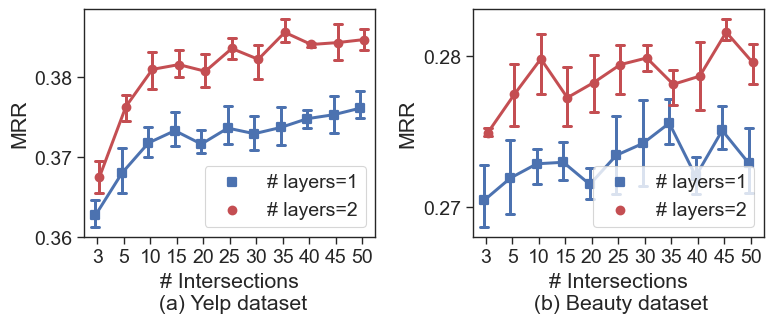

In [67]:
dataset = load_data(MODEL, SEED, ['yelp', 'beauty'], LAYER, LOCAL)
plot(dataset, 'sas_length')